### [데이터 시각화 - 시도별전출입인구수데이터]
- 엑셀파일 => DataFrame
- 도시간 인구이동에 대한 분석 및 시각화

[1] 모듈 로딩 및 데이터 준비 <hr>

In [61]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [62]:
# 판다스 출력 옵션
pd.options.display.max_colwidth = None

# 데이터 준비
DATA_FILE = '../DATA/시도별 전출입 인구수.xlsx'

# EXCEL => DataFrame : openpyxl 패키지 필요
dataDF = pd.read_excel(DATA_FILE)

In [63]:
# 데이터 확인
display(dataDF.head())
dataDF.info()

# 기본적인 전처리--------------------------------------
# -> 0번 행 삭제
# -> 전출지별 컬럼의 결측치 => 이전행의 값으로 채우기
# -> 1970년 ~ 2017년 컬럼 데이터 타입 object -> int
# -> 전출지별, 전입지별 => 행인덱스로 사용 가능
# -> 결측치 컬럼 존재 => 1984, 1985, 1986년 컬럼 3개
# -> 이상문자 '-' 거의 모든 컬럼에 존재 
# ---------------------------------------------------

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

[2] 전처리 <hr>

In [64]:
# [2-1] 불필요 데이터 제거 
# -> 0번 행 삭제
# -> 전출지별 컬럼의 결측치 => 이전행의 값으로 채우기
dataDF2 = dataDF.copy()

dataDF.drop(index = [0], inplace=True)

dataDF2.iloc[19:]

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
20,NaN,서울특별시,1232619,1158556,985945,1345508,1511726,2401970,2041724,2212213,...,1426213,1286855,1199708,1215122,1069300,1053008,1098023,1129529,1061915,1018807
21,NaN,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,NaN,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,NaN,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [65]:
# -> 전출지별 컬럼의 결측치 => 이전행의 값으로 채우기
dataDF2.isna().sum()

# dataDF2['전출지별'].fillna(method='ffill')
dataDF2['전출지별'] = dataDF2['전출지별'].ffill() # ffill(): 'forward fill' (앞쪽 방향 채우기)
dataDF2.isna().sum()

전출지별    1
전입지별    1
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    3
1985    3
1986    3
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

In [66]:
# -> 결측치 컬럼 존재 => 1984, 1985, 1986년 컬럼 3개 : 빈칸 => 0
pd.set_option('future.no_silent_downcasting', True)

dataDF2 = dataDF2.fillna(value=0)

# -> 이상문자 '-' 거의 모든 컬럼에 존재 : 없다는 의미로 사용 => 0
dataDF2= dataDF2.replace('-', 0)

In [67]:
# 기본 처리 후 체크
print(dataDF2.isna().sum())
print('--------------------------------------------')
print(dataDF2[dataDF2 == '-'].sum())

전출지별    0
전입지별    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64
--------------------------------------------
전출지별    0
전입지별    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
20

In [68]:
# [2-2] 자료형 변환
dataDF2.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,0,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,0,0,0,0,0,0,0,0,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


[3] 서울 => 타지역으로 이주한 인구 변화 시각화 <hr>

In [69]:
# 서울특별시 관련 데이터만 추출
seoulDF = dataDF2[dataDF2['전출지별'] == '서울특별시']

# 전출지별 컬럼 제거 + 전입지별 행인덱스로 설정
seoulDF = seoulDF.drop(columns='전출지별').set_index('전입지별')
# display(seoulDF)

# 전국, 서울특별시 제외한 나머지 지역만
seoulDF.drop(seoulDF.index[:2], inplace = True)

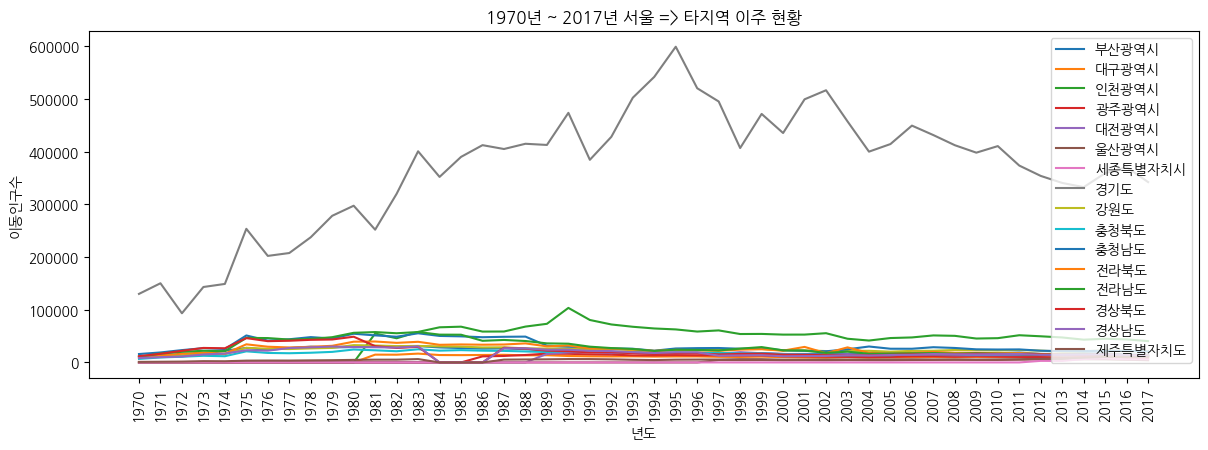

In [ ]:
# 그래프 표시 창 크기 설정
plt.figure(figsize = (12, 4))

# 서울에서 타지역으로 이주한 그래프
for label_idx in seoulDF.index:
    plt.plot(seoulDF.loc[label_idx], label=label_idx)

plt.tight_layout()
plt.legend()
plt.title("1970년 ~ 2017년 서울 => 타지역 이주 현황")
plt.xlabel('년도')
plt.ylabel('이동인구수')
plt.xticks(rotation=90)     # x축 눈금 라벨을 가로 => 90도 회전
plt.show()

In [71]:
def getLocalDF(local_name, local_idx):
    localDF = dataDF2[dataDF2['전출지별'] == local_name]

    localDF = localDF.drop(columns='전출지별').set_index('전입지별')

    localDF.drop(index=localDF.index[[0, local_idx]], inplace=True)

    return localDF

In [72]:
getLocalDF('서울특별시', )

TypeError: getLocalDF() missing 1 required positional argument: 'local_idx'